# Demo notebook for slide 3.3

In [1]:
%matplotlib widget
from bmcs_matmod.slide.slide_explorer import SlideExplorer
import bmcs_utils.api as bu

# Interactive case

Study the model behavior for interactively before approaching
a prefabricated parametric studies. 

In [ ]:
se = SlideExplorer()
se.slide_model.symb.damage_interaction = 'arithmetic'
material_params = dict(
    E_s=30000, gamma_s=0, K_s=0, S_s=.00000005, c_s=1, bartau=3, 
    E_w=30000, S_w=.00000005, c_w = 1, m = 0.1, f_t=3, f_c=20, f_c0=10, eta=1
)

In [5]:
%%capture
se = SlideExplorer(n_steps=200, k_max=50)
se.slide_model.trait_set(**material_params)
# se.trait_set(s_x_1 = 4, s_y_1 = 0, w_1 = 0);
# se.run()
# se.trait_set(s_x_1 = 2, s_y_1 = 1, w_1 = 0);
# se.run()
se.trait_set(s_x_1 = 0.01, s_y_1 = 0, w_1 = 0.01)
se.run()

In [48]:
se.energy_dissipation.show_iter = False
se.inel_state_evolution.t_max=1.0
bu.InteractiveWindow([se.inel_state_evolution, se, se.energy_dissipation, 
                      se.slide_model], figsize=(9,4), tight_layout=False).interact()

# Damage evolution for equal parameters N T

In [5]:
%%capture
import numpy as np
material_params = dict(
    E_s=1, gamma_s=0, K_s=0, S_s=5, c_s=1, bartau=3, 
    E_w=1, S_w=5, c_w=1, m = 0.005, f_t=3, f_c=20, f_c0=10, eta=1
)
eta_range = np.linspace(0,1,3)
se_T_list, se_N_list = [], []
for eta in eta_range:
    material_params['eta'] = eta
    se1 = SlideExplorer(n_steps=100, k_max=50)
    se1.slide_model.trait_set(**material_params)
    se1.trait_set(s_x_1 = 20, s_y_1 = 0, w_1 = 0);
    se1.run()
    se_T_list.append(se1)
    se2 = SlideExplorer(n_steps=200, k_max=50)
    se2.slide_model.trait_set(**material_params)
    se2.trait_set(s_x_1 = 0, s_y_1 = 0, w_1 = 20);
    se2.run()
    se_N_list.append(se2)

In [6]:
import matplotlib.pylab as plt
_, (ax_T, ax_N) = plt.subplots(1,2,figsize=(8,4))
ax_T.plot([0,1],[0,1],'--',color='black')
ax_N.plot([0,1],[0,1],'--',color='black')
for se_T, se_N in zip(se_T_list, se_N_list):
    s_x_pi_, s_y_pi_, w_pi_, z_, alpha_x_, alpha_y_, omega_T_, omega_N_ = se_N.Eps_arr.T
    #ax_T.plot(omega_T_,omega_N_)
    se_T.inel_state_evolution.plot_omega_NT(ax_T)
    se_N.inel_state_evolution.plot_omega_NT(ax_N)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
se_N_list[0].inel_state_evolution.interact()

# Damage evolution for non-equal N-T parameters

In [23]:
%%capture
import numpy as np
material_params = dict(
    E_s=1, gamma_s=0, K_s=0, S_s=10, c_s=2, bartau=3, 
    E_w=1, S_w=1, c_w=1, m = 0.05, f_t=3, f_c=20, f_c0=10, eta=1
)
eta_range = np.linspace(0,1,3)
se_T_list, se_N_list = [], []
for eta in eta_range:
    material_params['eta'] = eta
    se1 = SlideExplorer(n_steps=100, k_max=50)
    se1.slide_model.trait_set(**material_params)
    se1.trait_set(s_x_1 = 20, s_y_1 = 0, w_1 = 0);
    se1.run()
    se_T_list.append(se1)
    se2 = SlideExplorer(n_steps=200, k_max=50)
    se2.slide_model.trait_set(**material_params)
    se2.trait_set(s_x_1 = 0, s_y_1 = 0, w_1 = 20);
    se2.run()
    se_N_list.append(se2)

In [7]:
import matplotlib.pylab as plt
_, (ax_T, ax_N) = plt.subplots(1,2,figsize=(8,4))
ax_T.plot([0,1],[0,1],'--',color='black')
ax_N.plot([0,1],[0,1],'--',color='black')
for se_T, se_N in zip(se_T_list, se_N_list):
    s_x_pi_, s_y_pi_, w_pi_, z_, alpha_x_, alpha_y_, omega_T_, omega_N_ = se_N.Eps_arr.T
    #ax_T.plot(omega_T_,omega_N_)
    se_T.inel_state_evolution.plot_omega_NT(ax_T)
    se_N.inel_state_evolution.plot_omega_NT(ax_N)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
se_N_list[1].inel_state_evolution.interact()

# Reproduce the diagrams from the paper

In [3]:
%%capture
from bmcs_matmod.slide.slide_explorer import SlideExplorer
from bmcs_matmod.slide.slide_32 import Slide23Expr
import numpy as np
material_params = dict(
    E_s=100, gamma_s=50, K_s=50, S_s=0.2, c_s=1, bartau=5, 
    E_w=100, S_w=0.05, c_w=2, m = 0.05, f_t=5, f_c=20, f_c0=10, eta=1
)
eta_range = np.linspace(0,1,3)
se_T_list, se_N_list = [], []
for omega_interact in ['arithmetic','geometric']:
    for eta in eta_range:
        material_params['eta'] = eta
        se1 = SlideExplorer(n_steps=50, k_max=50)
        se1.slide_model.trait_set(**material_params)
        Slide23Expr.damage_interaction = omega_interact
        se1.slide_model.damage_interaction = omega_interact
        se1.trait_set(s_x_1 = 1, s_y_1 = 0, w_1 = 0);
        se1.run()
        se_T_list.append(se1)
        se2 = SlideExplorer(n_steps=200, k_max=50)
        se2.slide_model.trait_set(**material_params)
        se2.slide_model.damage_interaction = omega_interact
        se2.trait_set(s_x_1 = 0, s_y_1 = 0, w_1 = 1);
        se2.run()
        se_N_list.append(se2)

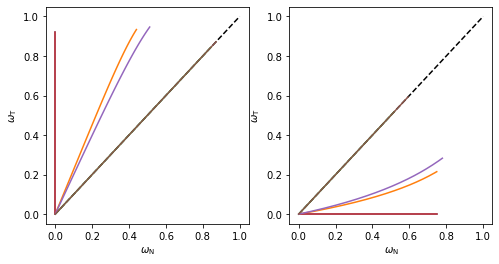

In [4]:
import matplotlib.pylab as plt
_, (ax_T, ax_N) = plt.subplots(1,2,figsize=(8,4))
ax_T.plot([0,1],[0,1],'--',color='black')
ax_N.plot([0,1],[0,1],'--',color='black')
for se_T, se_N in zip(se_T_list, se_N_list):
    s_x_pi_, s_y_pi_, w_pi_, z_, alpha_x_, alpha_y_, omega_T_, omega_N_ = se_N.Eps_arr.T
#    ax_T.plot(omega_T_,omega_N_)
    se_T.inel_state_evolution.plot_omega_NT(ax_T)
    se_N.inel_state_evolution.plot_omega_NT(ax_N)

In [ ]:
se_T_list[0].inel_state_evolution.interact()